### Import your libraries

In [157]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

### Load your dataset

In [158]:
edu = pd.read_csv('HR_Missing_Vslues.csv')
edu

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
0,"Adinolfi, Wilson K",10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0
1,"Ait Sidi, Karthikeyan",10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0
2,"Akinkuolie, Sarah",10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0
3,"Alagbe,Trina",10088,64991.0,19,Production Technician I,NaN,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0
4,NaN,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,9/6/2016,Production,Webster Butler,39.0,Google Search,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,65893.0,20,Production Technician II,05/11/85,M,Single,White,7/7/2014,NaN,Production,Kissy Sullivan,20.0,LinkedIn,13.0
307,"Ybarra, Catherine",10301,48513.0,19,Production Technician I,NaN,F,Single,Asian,9/2/2008,9/29/2015,Production,Brannon Miller,12.0,Google Search,4.0
308,NaN,10010,220450.0,6,CIO,NaN,F,Single,White,4/10/2010,NaN,IT/IS,Janet King,2.0,Employee Referral,16.0
309,"Zhou, Julia",10043,89292.0,9,Data Analyst,02/24/79,F,Single,White,3/30/2015,NaN,IT/IS,Simon Roup,4.0,Employee Referral,NaN


In [159]:
# Explore your data 

#First 5 recods
# Last 5 records 
# Check data type
# Show statistical summary 
# Is there any missing values ? yes
# Applay two more data analysis from your choose 

In [160]:
#First 5 recods
edu.head()

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
0,"Adinolfi, Wilson K",10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0
1,"Ait Sidi, Karthikeyan",10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0
2,"Akinkuolie, Sarah",10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0
3,"Alagbe,Trina",10088,64991.0,19,Production Technician I,NaN,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0
4,NaN,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,9/6/2016,Production,Webster Butler,39.0,Google Search,2.0


In [161]:
edu.tail()

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
306,"Woodson, Jason",10135,65893.0,20,Production Technician II,05/11/85,M,Single,White,7/7/2014,NaN,Production,Kissy Sullivan,20.0,LinkedIn,13.0
307,"Ybarra, Catherine",10301,48513.0,19,Production Technician I,NaN,F,Single,Asian,9/2/2008,9/29/2015,Production,Brannon Miller,12.0,Google Search,4.0
308,NaN,10010,220450.0,6,CIO,NaN,F,Single,White,4/10/2010,NaN,IT/IS,Janet King,2.0,Employee Referral,16.0
309,"Zhou, Julia",10043,89292.0,9,Data Analyst,02/24/79,F,Single,White,3/30/2015,NaN,IT/IS,Simon Roup,4.0,Employee Referral,NaN
310,NaN,10271,45046.0,19,Production Technician I,08/17/78,F,Widowed,Asian,9/29/2014,NaN,Production,David Stanley,14.0,LinkedIn,2.0


In [162]:
#Check data type
 
edu.dtypes


Employee_Name         object
EmpID                  int64
Salary               float64
PositionID             int64
Position              object
DOB                   object
Sex                   object
MaritalDesc           object
RaceDesc              object
DateofHire            object
DateofTermination     object
Department            object
ManagerName           object
ManagerID            float64
RecruitmentSource     object
Absences             float64
dtype: object

In [163]:
#Show statistical summary 
edu.describe()


,EmpID,Salary,PositionID,ManagerID,Absences
count,311.000000,249.000000,311.000000,303.000000,280.000000
mean,10156.000000,67972.662651,16.845659,14.570957,10.128571
std,89.922189,22995.908395,6.223419,8.078306,5.946407
min,10001.000000,45046.000000,1.000000,1.000000,1.000000
25%,10078.500000,55315.000000,18.000000,10.000000,4.750000
50%,10156.000000,62957.000000,19.000000,15.000000,10.000000
75%,10233.500000,71707.000000,20.000000,19.000000,15.250000
max,10311.000000,220450.000000,30.000000,39.000000,20.000000


In [164]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_Name      218 non-null    object 
 1   EmpID              311 non-null    int64  
 2   Salary             249 non-null    float64
 3   PositionID         311 non-null    int64  
 4   Position           311 non-null    object 
 5   DOB                280 non-null    object 
 6   Sex                249 non-null    object 
 7   MaritalDesc        311 non-null    object 
 8   RaceDesc           311 non-null    object 
 9   DateofHire         311 non-null    object 
 10  DateofTermination  104 non-null    object 
 11  Department         311 non-null    object 
 12  ManagerName        311 non-null    object 
 13  ManagerID          303 non-null    float64
 14  RecruitmentSource  311 non-null    object 
 15  Absences           280 non-null    float64
dtypes: float64(3), int64(2), o

In [165]:
* Is there any missing values ? yes
* Applay two more data analysis from your choose 

SyntaxError: invalid syntax (1657276828.py, line 1)

### Do the following steps for each column with missing values.

* Identity the column 
* How much precentage the missing value represents 
* What is the best way to handle these missing values and why
* Apply yourr method to the column

In [166]:
#edu.count()


In [167]:
edu.isnull().sum()


Employee_Name         93
EmpID                  0
Salary                62
PositionID             0
Position               0
DOB                   31
Sex                   62
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    207
Department             0
ManagerName            0
ManagerID              8
RecruitmentSource      0
Absences              31
dtype: int64

In [168]:
#Identity the column 
col= pd.DataFrame(edu, columns=['Employee_Name', 'Salary', 'DOB', 'Sex', 'DateofTermination','Absences'])
col.loc[:25]

,Employee_Name,Salary,DOB,Sex,DateofTermination,Absences
0,"Adinolfi, Wilson K",62506.0,07/10/83,M,NaN,1.0
1,"Ait Sidi, Karthikeyan",104437.0,05/05/75,M,6/16/2016,17.0
2,"Akinkuolie, Sarah",64955.0,09/19/88,F,9/24/2012,3.0
3,"Alagbe,Trina",64991.0,NaN,F,NaN,15.0
4,NaN,50825.0,09/08/89,F,9/6/2016,2.0
5,NaN,57568.0,05/22/77,F,NaN,15.0
6,"Andreola, Colby",95660.0,05/24/79,F,NaN,19.0
7,"Athwal, Sam",59365.0,02/18/83,M,NaN,19.0
8,NaN,47837.0,02/11/70,F,NaN,4.0
9,NaN,NaN,01/07/88,NaN,NaN,16.0


In [169]:
#How much precentage the missing value represents 
col.isnull().sum()/len(col)

Employee_Name        0.299035
Salary               0.199357
DOB                  0.099678
Sex                  0.199357
DateofTermination    0.665595
Absences             0.099678
dtype: float64

In [170]:
col.isnull().mean().round(4) * 100


Employee_Name        29.90
Salary               19.94
DOB                   9.97
Sex                  19.94
DateofTermination    66.56
Absences              9.97
dtype: float64

In [171]:
# What is the best way to handle these missing values and why

Imputation
beacuse replacing a missing value with another value 

SyntaxError: invalid syntax (4237614334.py, line 4)

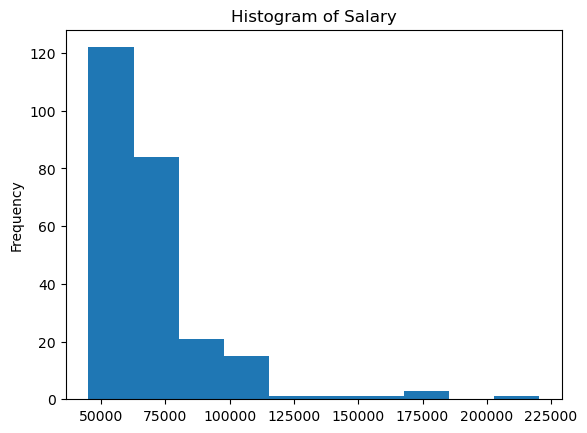

In [172]:
#Apply yourr method to the column

edu['Salary'].plot(kind="hist", title="Histogram of Salary");


In [173]:
#standard deviation
edu['Salary'].var()

528811802.89380103

In [174]:
Salary_mean = round(edu['Salary'].mean())
Salary_mean

67973

In [175]:
edu['Salary'] = edu['Salary'].fillna(Salary_mean)
edu['Salary'].isnull().sum()

0

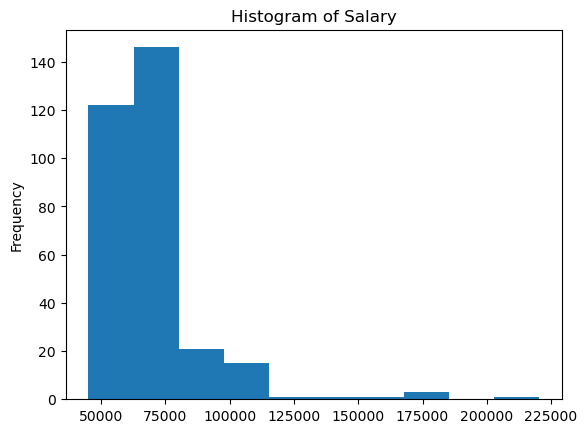

In [176]:
edu['Salary'].plot(kind="hist", title="Histogram of Salary");


In [177]:
edu.isnull().sum()


Employee_Name         93
EmpID                  0
Salary                 0
PositionID             0
Position               0
DOB                   31
Sex                   62
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    207
Department             0
ManagerName            0
ManagerID              8
RecruitmentSource      0
Absences              31
dtype: int64

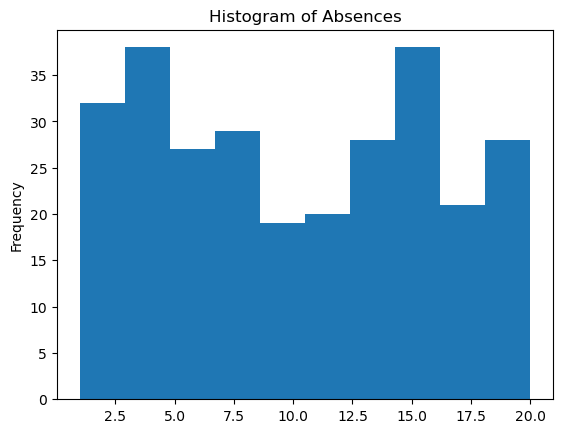

In [178]:
edu['Absences'].plot(kind="hist", title="Histogram of Absences");


In [179]:
edu['Absences'].var()

35.35975422427032

In [180]:
Absences_mean = round(edu['Absences'].mean())
Absences_mean

10

In [181]:
edu['Absences'] = edu['Absences'].fillna(Absences_mean)
edu['Absences'].isnull().sum()

0

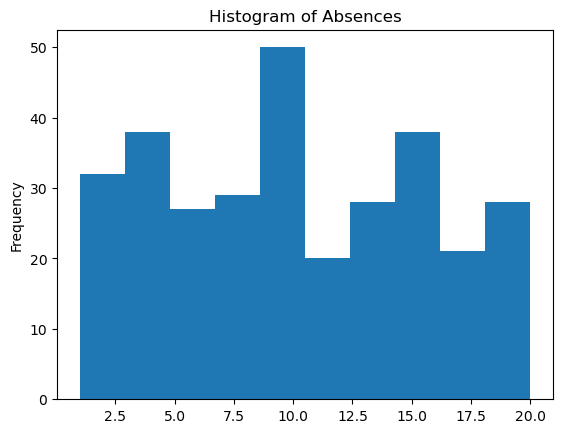

In [182]:
edu['Absences'].plot(kind="hist", title="Histogram of Absences");


In [183]:
edu.isnull().sum()


Employee_Name         93
EmpID                  0
Salary                 0
PositionID             0
Position               0
DOB                   31
Sex                   62
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    207
Department             0
ManagerName            0
ManagerID              8
RecruitmentSource      0
Absences               0
dtype: int64

In [184]:
col.isnull().sum()

Employee_Name         93
Salary                62
DOB                   31
Sex                   62
DateofTermination    207
Absences              31
dtype: int64

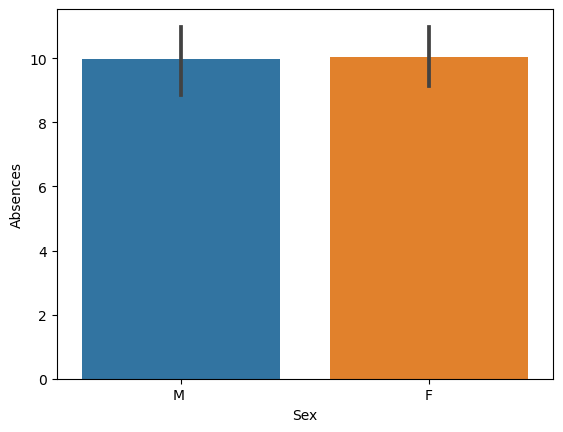

In [185]:
sns.barplot(x='Sex', y='Absences',data=edu); # it shows the average 


In [186]:
edu['Sex'] = edu['Sex'].fillna(method="ffill")
edu['Sex'] 

0      M 
1      M 
2       F
3       F
4       F
       ..
306    M 
307     F
308     F
309     F
310     F
Name: Sex, Length: 311, dtype: object

In [187]:
edu.isnull().sum()

Employee_Name         93
EmpID                  0
Salary                 0
PositionID             0
Position               0
DOB                   31
Sex                    0
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    207
Department             0
ManagerName            0
ManagerID              8
RecruitmentSource      0
Absences               0
dtype: int64

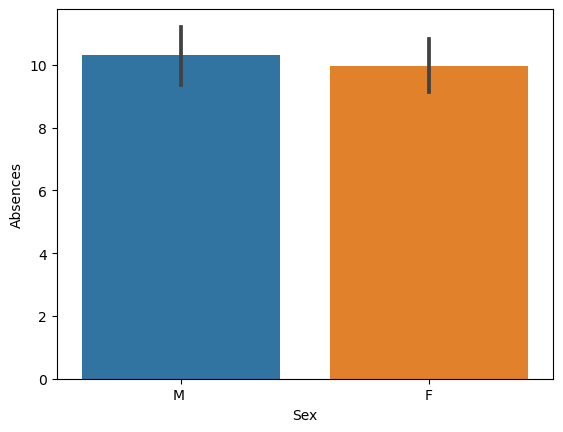

In [188]:
sns.barplot(x='Sex', y='Absences',data=edu); # it shows the average 


In [194]:
edu['DateofTermination'].fillna(method="bfill", inplace =True)


In [195]:
edu['DOB'] = edu['DOB'].fillna(method="ffill")


In [196]:
edu.isnull().sum()

Employee_Name        93
EmpID                 0
Salary                0
PositionID            0
Position              0
DOB                   0
Sex                   0
MaritalDesc           0
RaceDesc              0
DateofHire            0
DateofTermination     3
Department            0
ManagerName           0
ManagerID             8
RecruitmentSource     0
Absences              0
dtype: int64

Employee_Name         93
Salary                62
DOB                   31
Sex                   62
DateofTermination    207
Absences              31
dtype: int64